# 作業 3_2

## 環境

請填寫當前執行使用的環境。

|環境|名稱|版本|
|-|-|-|
|作業系統|Windows|10|
|程式執行環境|jupyter notebook|1.0.0|
|python 版本|python3|3.6.9|
|安裝環境|pip|20.0.2|

## 安裝

請填寫安裝套件需要的指令

pip install -r requirements.txt


In [9]:
# 請勿更動此區塊程式碼

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.preprocessing import StandardScaler


EXECUTION_START_TIME = time.time() # 計算執行時間

df = pd.read_csv('train.csv')      # 讀取資料，請勿更改路徑

## 資料分析與前處理

請在此區塊後使用**一個或多個區塊**進行資料分析與前處理，項目可以包含：

- 資料視覺化
- 相關係數
- 決定輸入特徵
- 處理缺失值
- 轉換數值
- 轉換類別
- 其他

請以 `markdown` 簡單描述**流程**、**方法**與**原因**：

1. 觀察...，發現...
2. 填補...，策略...
3. 轉換...，原因...

In [2]:
# 資料分析與前處理

import seaborn as sns   
from sklearn.svm import SVC
df.drop('Unnamed: 25', axis = 1, inplace = True)
column_names = ['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']
df.columns = column_names
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4299 non-null   object 
 1   churches               4299 non-null   float64
 2   resorts                4299 non-null   float64
 3   beaches                4299 non-null   float64
 4   parks                  4299 non-null   float64
 5   theatres               4299 non-null   float64
 6   museums                4299 non-null   float64
 7   malls                  4299 non-null   float64
 8   zoo                    4299 non-null   float64
 9   restaurants            4299 non-null   float64
 10  pubs_bars              4299 non-null   float64
 11  local_services         4299 non-null   object 
 12  burger_pizza_shops     4298 non-null   float64
 13  hotels_other_lodgings  4299 non-null   float64
 14  juice_bars             4299 non-null   float64
 15  art_

In [3]:
#檢查有沒有缺失值
df[column_names].isnull().sum()


user_id                  0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       1
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

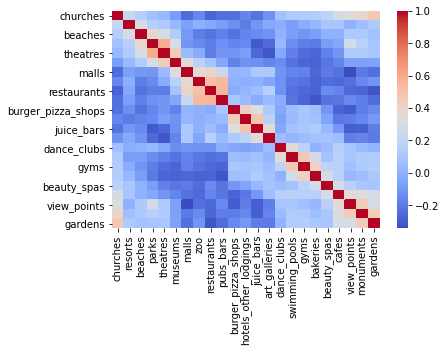

In [8]:
#把缺失值用平均值做填補
df = df.fillna(df.mean())

#將資料轉成matrix，然後利用熱度凸顯示出關聯矩陣
cor=df.corr()
sns.heatmap(cor,annot=False,cmap='coolwarm')

In [ ]:
# 計算 Fare 欄位各個百分位數(Percentile)
P_all = [ np.percentile( df.Fare, q=i ) for i in np.arange(0,101) ] 
Pth_Percentile = pd.DataFrame( { 'Q':list(range(101)), 'Value':P_all } )

# The first、second and third quartile(i,e., the 25th、50th and 75th Percentile)
Q1 = Pth_Percentile.iloc[ 25, 1 ]
Q2 = Pth_Percentile.iloc[ 50, 1 ]
Q3 = Pth_Percentile.iloc[ 75, 1 ]
IQR = Q3 - Q1

print( f'Q1 = {Q1}' )
print( f'Q2 = {Q2} = Median' )
print( f'Q3 = {Q3}' )
print( f'Maximum = {df.Fare.max()}')
print( f'IQR = Q3 - Q1 = {IQR}' )
print( f'Q3 + 1.5IQR = {Q3+1.5*IQR}' )

# 依照四分位數，對 Fare 欄位進行分組
Fare_bin = [ 0, Q1, Q2, Q3, Q3+1.5*IQR, df.Fare.max() ]
df[ 'Fare_Group' ] = pd.cut( df.Fare.values, Fare_bin )

# 計算每個分組中的資料筆數
Group_Counts = df[ 'Fare_Group' ].value_counts().reset_index()    
Group_Counts.columns = [ 'Fare_Group', 'Counts' ]
Group_Counts.sort_values( by='Fare_Group' )

- **利用資料視覺化觀察票價與生存率之關係**
    

## 模型訓練

請在此區塊後使用**一個或多個區塊**進行模型訓練，**需要**包含以下內容：

- **選擇模型**
    - 設定模型**超參數**
    - **控制隨機亂數**
- 計算**準確度（Accuracy）**
    - 使用 **5-fold cross validation**，輸出**平均準確度**
    - 最後再使用**所有**資料進行訓練並輸出**準確度**
    - 準確度必須**超越**課堂使用的範例
    
如果有進行多於一個以上的實驗，**可以保留所有**的實驗結果，但是執行時間將會納入**全部**實驗。

## 模型描述
   
    使用作業要求的集成方法（ensemble learning）把base estimator组合起来形成Random Forest，以避免偏差及overfit在這邊把n_estimators設定為250棵，數量太小達不到效果，太大的話怕電腦運行太久，min_samples_split設為20，代表若是決策樹的子樹的樣本小於20的話，就不再繼續劃分，以避免overfit，oob_score:因為bagging採取隨機抽樣建立樹模型，未被抽取到的樣本集，可以用來驗證模型效果，在此設定為true

In [ ]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.ensemble import  RandomForestClassifier  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    #model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    model=RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True) #!!!!!!!!!
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))
model.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)             # 計算準確度

print('accuracy with total data : {}'.format(acc))      
flag=0

- **下面的模型**
    - 使用SVC(Support Vector Machine)模型
    - SVC是 Supervised learning的方法，大多用在統計分類(classification)和回歸分析(regression analysis)。
    - 'Embarked'之資料前處理"由於有缺失資料，因此補上出現次數最多的S，然後再將'Embarked'轉換類別變成數字0,1,2

In [ ]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.ensemble import  RandomForestClassifier  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具


train_df = pd.read_csv('./train.csv')
train_x = train_df[['Sex', 'Age', 'Fare','Pclass','Embarked']]        # 取出訓練資料需要分析的資料欄位
train_y = train_df['Survived']                    # 取出訓練資料的答案


# 類別型態資料前處理# 數值型態資料前處理

imputer = SimpleImputer(strategy='median')        # 創造 imputer 並設定填補策略
age = train_x['Age'].to_numpy().reshape(-1, 1)
imputer.fit(age)                                  # 根據資料學習需要填補的值
train_x['Age'] = imputer.transform(age)           # 填補缺失值

# 類別型態資料前處理

le = LabelEncoder()                               # 創造 Label Encoder
le.fit(train_x['Sex'])                            # 給予每個類別一個數值
train_x['Sex'] = le.transform(train_x['Sex'])     # 轉換所有類別成為數值

train_x['Embarked']=train_x['Embarked'].fillna('S') #將缺失的'Embarked'補上最多出現的s
train_x['Embarked']=train_x['Embarked'].astype('category').cat.codes

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)

kf.get_n_splits(train_x)                              # 給予資料範圍
train_x.tail(5) 
train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    #model = DecisionTreeClassifier(random_state=1012) # 創造決策樹模型
    
    model = SVC(random_state=1012)                    # 創造支援向量機模型
    
    model.fit(train_x, train_y)                       # 訓練支援向量機模型
    
    #model=RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True) #!!!!!!!!!
    #model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
                               train_pred_y)
    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
                               valid_pred_y)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

print((
    'average train accuracy: {}\n' +
    '    min train accuracy: {}\n' +
    '    max train accuracy: {}\n' +
    'average valid accuracy: {}\n' +
    '    min valid accuracy: {}\n' +
    '    max valid accuracy: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
))
model.fit(train_x, train_y)                       # 訓練決策樹模型

pred_y = model.predict(train_x)                   # 確認模型是否訓練成功
acc = accuracy_score(train_y, pred_y)             # 計算準確度

print('accuracy with tatal data : {}'.format(acc))      

In [ ]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))